In [2]:
import pandas as pd

df = pd.read_excel('../data/Online Retail.xlsx')
df = df.dropna(subset=['CustomerID'])
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [3]:
from datetime import timedelta

snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Segment'] = kmeans.fit_predict(X)
rfm.head()


,CustomerID,Recency,Frequency,Monetary,Segment
0,12346.0,326,1,77183.60,0
1,12347.0,2,7,4310.00,3
2,12348.0,75,4,1797.24,3
3,12349.0,19,1,1757.55,3
4,12350.0,310,1,334.40,1


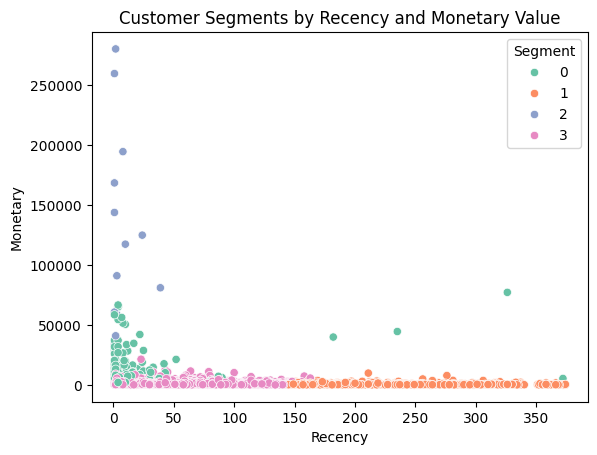

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Segment', palette='Set2')
plt.title('Customer Segments by Recency and Monetary Value')
plt.show()


## 📊 Data Exploration
Let's understand the structure and key characteristics of the UCI Online Retail dataset.


In [6]:
# Number of rows and columns
print("📦 Shape of dataset:", df.shape)

# Display random sample of 5 rows
print("\n🔍 Sample rows:")
display(df.sample(5))

# Number of unique customers
print("\n👥 Unique customers:", df['CustomerID'].nunique())

# Top 10 countries by order count
print("\n🌍 Top 10 countries by order count:")
display(df['Country'].value_counts().head(10))

# Quantity stats
print("\n📦 Quantity distribution:")
display(df['Quantity'].describe())

# Negative quantities (possibly returns)
print("\n❗ Negative quantities (returns or cancellations):")
display(df[df['Quantity'] < 0].head())

# Price stats
print("\n💷 Unit price distribution:")
display(df['UnitPrice'].describe())


📦 Shape of dataset: (397924, 9)

🔍 Sample rows:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
204142,554636,23076,ICE CREAM SUNDAE LIP GLOSS,24,2011-05-25 11:52:00,1.25,16763.0,United Kingdom,30.00
247394,558768,21034,REX CASH+CARRY JUMBO SHOPPER,1,2011-07-03 13:33:00,0.95,15952.0,United Kingdom,0.95
497897,578485,22382,LUNCH BAG SPACEBOY DESIGN,10,2011-11-24 12:52:00,1.65,12921.0,United Kingdom,16.50
135449,547896,22483,RED GINGHAM TEDDY BEAR,1,2011-03-28 11:34:00,2.95,17841.0,United Kingdom,2.95
133173,547729,22717,CARD DOG AND BALL,12,2011-03-25 10:52:00,0.42,15529.0,United Kingdom,5.04



👥 Unique customers: 4339

🌍 Top 10 countries by order count:


Country
United Kingdom    354345
Germany             9042
France              8342
EIRE                7238
Spain               2485
Netherlands         2363
Belgium             2031
Switzerland         1842
Portugal            1462
Australia           1185
Name: count, dtype: int64


📦 Quantity distribution:


count    397924.000000
mean         13.021823
std         180.420210
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64


❗ Negative quantities (returns or cancellations):


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice



💷 Unit price distribution:


count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64